<a href="https://colab.research.google.com/github/jkjh23/BusanAIDeveloperCourse_AI/blob/master/2_MachineLearning/4_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5_%ED%9A%8C%EA%B7%80_%EC%84%B1%EB%8A%A5%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 연구목표

- 영화에 대한 고객들의 평가 데이터를 가지고, 분석 / 예측 등 회귀모델을 이용하여서 구현하겠다.
- 회귀의 평가지표로 손실함수를 사용한다.
  - 손실함수는 0에 수렴할수록 성능이 좋다.
- 특성의 조합에 따라 평가 지표값이 들게 나올 수 있다.
- 데이터의 순서, 특성의 종류, 조합 등에 따른 지표 변화도 관찰해보겠다.
- 회귀 모델 알고리즘은 fastlib라는 thirdpart 제품을 사용한다. -> 파이썬으로 wrapping된 패키지를 사용(해당 제품은 리눅스와 맥만 설치가 가능하다. colab은 리눅스.)

# 데이터 획득
- 데이터 경로 : /content/drive/My Drive/Colab Notebooks/ml/4_data/ml-100k
- 연구용으로 준비된 영화 데이터를 사용

# 데이터 준비

In [2]:
import pandas as pd
import numpy as np

## 회원 정보 로드

In [3]:
# 데이터 로드
# 고객 데이터 : u.user
# 인덱스|나이|성별|직업|우편번호
dir = "/content/drive/My Drive/2020_AI_Busan/3_MachineLearning/4_data/ml-100k/"
users = pd.read_csv(dir+"u.user", sep="|", names=["uid","age","s","job","zip_code"])
users.head()

,uid,age,s,job,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [4]:
users.shape

(943, 5)

In [5]:
users.uid.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

## 영화 정보 로드

In [6]:
# 필요한 부분만 취해서 df 구성
movies = pd.read_csv(dir+"u.item", sep="|", encoding='latin1', names=["mid","title","release_date","video_release_date","url"], usecols=range(5))
movies.head()

,mid,title,release_date,video_release_date,url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


In [7]:
movies.shape

(1682, 5)

## 평점 정보 로드
- u.data

In [8]:
# 시간은 1970.1.1 00:00:00부터 현재까지 경과된 시간 + 09:00 (영국-한국 시차, summer time 적용 X)
cols = ["uid", "mid", "rate", "date"]
ratings = pd.read_csv(dir+"u.data", sep="\t", names=cols)
ratings.head()

,uid,mid,rate,date
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [9]:
# date -> YYYY-MM-DD hh:mm:ss 스타일로 조정
ratings['date'] = pd.to_datetime(ratings['date'], unit='s')
ratings.head()

,uid,mid,rate,date
0,196,242,3,1997-12-04 15:55:49
1,186,302,3,1998-04-04 19:22:22
2,22,377,1,1997-11-07 07:18:36
3,244,51,2,1997-11-27 05:02:03
4,166,346,1,1998-02-02 05:33:16


In [10]:
ratings.shape

(100000, 4)

## 데이터 3개를 병합

In [11]:
movies_ratings = pd.merge(movies, ratings)
movies_ratings

,mid,title,release_date,video_release_date,url,uid,rate,date
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,1998-02-17 17:28:52
1,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,287,5,1997-09-27 04:21:28
2,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,148,4,1997-10-16 16:30:11
3,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,280,4,1998-04-04 14:33:46
4,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,66,3,1997-12-31 20:48:44
...,...,...,...,...,...,...,...,...
99995,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,863,1,1998-03-07 16:52:50
99996,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,863,3,1998-03-07 16:51:31
99997,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),863,2,1998-03-07 16:52:50
99998,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,896,3,1998-02-11 01:32:02


In [12]:
movies_ratings.shape
# movie는 1682개, ratings는 10000개인데 병합해서 10000개 나옴 => 리뷰 기준으로 데이터가 세팅되고, movie데이터는 중복적으로 많이 등장한다.

(100000, 8)

In [13]:
movies_ratings_users = pd.merge(movies_ratings, users)
movies_ratings_users

,mid,title,release_date,video_release_date,url,uid,rate,date,age,s,job,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,1998-02-17 17:28:52,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,1998-02-17 17:51:30,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,1998-02-17 18:20:08,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,1998-02-17 18:07:27,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,1998-02-17 17:31:36,60,M,retired,95076
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,748,"Saint, The (1997)",14-Mar-1997,NaN,http://us.imdb.com/M/title-exact?Saint%2C%20Th...,729,4,1998-04-22 23:10:38,19,M,student,56567
99996,751,Tomorrow Never Dies (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-12...,729,3,1998-04-22 23:05:38,19,M,student,56567
99997,879,"Peacemaker, The (1997)",01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Peacemaker%2C...,729,3,1998-04-22 23:04:59,19,M,student,56567
99998,894,Home Alone 3 (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-11...,729,1,1998-04-22 23:08:31,19,M,student,56567


In [14]:
movies_ratings_users.shape

(100000, 12)

# 데이터 분석
- 특성, 데이터의 성향 등을 확인해보도록 한다.

In [15]:
# 사본 획득
mru_tmp = movies_ratings_users[:]

In [16]:
# 평가를 가장 많이 받은 작품들 중 상위 10개만 출력하시오.(제목, 평가수)
mru_tmp.title.value_counts()[:10]

Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: title, dtype: int64

In [17]:
# 하위 5개
mru_tmp.title.value_counts()[-5:]

Niagara, Niagara (1997)                      1
Vermont Is For Lovers (1992)                 1
Small Faces (1995)                           1
Scream of Stone (Schrei aus Stein) (1991)    1
Woman in Question, The (1950)                1
Name: title, dtype: int64

In [18]:
# 전체 영화 중에서 평점이 1개만 존재하는 영화의 비율
# ( 평가를 1개 받은 영화수 / 전체 영화수) * 100
tmp = mru_tmp.title.value_counts()
tmp_a = tmp[tmp == 1]
( tmp_a.shape[0] / movies.shape[0] ) * 100
# 7.97%가 평가를 한개만 받았다. -> 빈익빈 부익부 형태가 일단 보인다. 유명한 작품들만 리뷰가 많은 것 같은 형태가 보인다. (더 체크해봐야겠지만, 좀 더 검토 수행할 필요 有) 

7.966706302021404

In [19]:
# 제목 기준으로 평가의 개수와 평점의 평균을 컬럼을 가진 df를 구성하시오
# 인덱스는 제목, 컬럼은 평가개수, 평균평점
movies_state = mru_tmp.groupby( 'title' ).agg( { 'rate' : [ np.size, np.mean ] } )
movies_state

rate          
                                       size      mean
title                                                
'Til There Was You (1997)                 9  2.333333
1-900 (1994)                              5  2.600000
101 Dalmatians (1996)                   109  2.908257
12 Angry Men (1957)                     125  4.344000
187 (1997)                               41  3.024390
...                                     ...       ...
Young Guns II (1990)                     44  2.772727
Young Poisoner's Handbook, The (1995)    41  3.341463
Zeus and Roxanne (1997)                   6  2.166667
unknown                                   9  3.444444
ï¿½ kï¿½ldum klaka (Cold Fever) (1994)    1  3.000000

[1664 rows x 2 columns]

In [20]:
# 이중에서 평가를 100개 이상 받은 데이터만 모은다.
movies_100_over = movies_state[ movies_state[ 'rate' ][ 'size' ] >= 100 ]
movies_100_over

rate          
                                             size      mean
title                                                      
101 Dalmatians (1996)                         109  2.908257
12 Angry Men (1957)                           125  4.344000
2001: A Space Odyssey (1968)                  259  3.969112
Absolute Power (1997)                         127  3.370079
Abyss, The (1989)                             151  3.589404
...                                           ...       ...
Willy Wonka and the Chocolate Factory (1971)  326  3.631902
Wizard of Oz, The (1939)                      246  4.077236
Wrong Trousers, The (1993)                    118  4.466102
Young Frankenstein (1974)                     200  3.945000
Young Guns (1988)                             101  3.207921

[338 rows x 2 columns]

In [21]:
# 평균 기준으로 정렬, 컬럼이 2 level인 경우
# 리뷰의 의미를 100개 이상 받은 것만 데이터로 간주하겠다. (설정)
movies_100_over_sorted = movies_100_over.sort_values(by=[ ('rate', 'mean') ], ascending=False)
movies_100_over_sorted

rate          
                                 size      mean
title                                          
Close Shave, A (1995)             112  4.491071
Schindler's List (1993)           298  4.466443
Wrong Trousers, The (1993)        118  4.466102
Casablanca (1942)                 243  4.456790
Shawshank Redemption, The (1994)  283  4.445230
...                               ...       ...
Spawn (1997)                      143  2.615385
Event Horizon (1997)              127  2.574803
Crash (1996)                      128  2.546875
Jungle2Jungle (1997)              132  2.439394
Cable Guy, The (1996)             106  2.339623

[338 rows x 2 columns]

In [22]:
# 회원 기준에서 평가를 얼마나 했는가
# 사용자별 평가 횟수
tmp = mru_tmp.groupby('uid').size()
tmp.sort_values( ascending=False ).head()

uid
405    737
655    685
13     636
450    540
276    518
dtype: int64

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

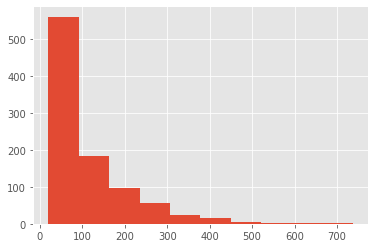

In [24]:
plt.style.use('ggplot')
tmp.sort_values( ascending=False ).hist()
# x축이 리뷰 수, y축이 고객 수
# 리뷰의 수가 적을수록 많은 분포되어 있고, 리뷰를 많이 남긴 다른 사람은 점점 소수로 전개된다. (리뷰를 적게 남긴 사람이 많다.)
# 소수의 사람들이 대다수의 리뷰를 반복적으로 쓰고 있다.
# 아래와 같은 그래프를 롱테일분포(지프의 법칙을 따르는 데이터 굴곡 형태)라고 한다.
# 영화의 평가 개수가 많으면 많을수록 1번만 평가한 데이터도 많아진다.

# 모델 구축
- libFM(fastlib, ..,) 을 파이썬으로 wrapping한 버전 => fastFM
- 설치
  - !pip install fastFM

In [25]:
!pip install fastFM

     |████████████████████████████████| 491kB 5.3MB/s 


- 제공 알고리즘 제품군(fastFM)
  - 회귀, 분류의 지도학습 기능을 제공하는 모듈
  - 특성들 사이에 상호 영향성, 상호 작용 개념을 계산에 적용하여서 처리하는 기능을 제공 (조합, 순서 등도 성능에 영향을 미치게 한다.)
  - ALS
    - 교대 최소 제곱법
  - SGD
    - 확률적 경사 하강법
  - MCMC
    - 마르코프 연쇄 몬테카를로 기법
    - 하이퍼파라미터 적고, 학습 속도는 느리다.

In [26]:
# 문자열을 벡터화 처리한다.
from sklearn.feature_extraction import DictVectorizer
from fastFM import als
from sklearn.model_selection import learning_curve

In [27]:
v = DictVectorizer()

In [28]:
# 더미 데이터
# 일종의 특성 데이터, 특성 데이터들을 문자열로 처리, 나이는 임의로 수치로 표현했다.
train = [
         {'user' : '1', 'item' : '5' , 'age' : 19}, 
         {'user' : '2', 'item' : '43' , 'age' : 33}, 
         {'user' : '3', 'item' : '30' , 'age' : 55}, 
         {'user' : '4', 'item' : '10' , 'age' : 20}
]

In [29]:
# 데이터를 벡터화 처리하여 수치로 표현
X = v.fit_transform(train)

In [30]:
# 문자열을 범주형 변수로 두고, 중복되지 않은 총개수로 0을 세팅하고 해당되는 데이터에 1을 임의로 부여하여 수치로 표현하였다. (원-핫 인코딩)
X.toarray()

array([[19.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.],
       [33.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
       [55.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.],
       [20.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [31]:
# 해당 유저가 해당 작품을 보고 리뷰 평점한 데이터(더미) -> 정답
y = np.array( [5.0, 1.0, 2.0, 4.0] )

In [32]:
# 알고리즘 생성
fm = als.FMRegression(n_iter = 10000, init_stdev=0.1, rank=2, l2_reg=0.1, l2_reg_V=0.5)

In [33]:
fm.fit( X, y )

FMRegression(init_stdev=0.1, l2_reg=0.1, l2_reg_V=0.1, l2_reg_w=0.1,
             n_iter=10000, random_state=123, rank=2)

In [34]:
# 예측 : 나이가 24살이다. 아이템 10번을 관람하였다. 이 유저는 평점을 몇점을 낼 것인가?
data = {'user' : '5', 'item' : '10', 'age':24}
fm.predict(v.transform(data))
# 해당 유저는 10번 영화를 보고 평점을 3.7로 부여할 것이라고 예측
# 이것이 얼마나 정확한가 -> 회귀의 평가지표 중 손실함수값을 통해서 검토

array([3.66088998])

## 준비
- 데이터를 수치화하는 처리
  - 문자열을 수치화(원-핫 인코딩을 주로 사용)
  - 경우에 따라서는 이미 값이 수치인데, 문자열으로 처리해서 원-핫인코딩으로 처리한다.

- 포인트
  - 회귀 기법을 이용한 머신러닝 처리 시
  - 데이터 준비
  - 예측
  - 성능 평가 파트

In [38]:
# 데이터 로드
# ua.base, ua.test
def pre_loadData(fileName, dir = "/content/drive/My Drive/2020_AI_Busan/3_MachineLearning/4_data/ml-100k") :
  # 훈련 데이터 담는 그릇(리스트)
  data = list()
  # 훈련 데이터 중 평점(점수)를 담는 리스트
  ratings = list()

  with open(f'{dir}/{fileName}') as f :
    # 한줄씩 읽는다.
    # 방법 1
    # while True :
    #   txt = f.readline
    #   if not txt : 
    #     break
    # 방법 2
    for line in f :
      # 데이터를 나눈다.
      uid, mid, rating, _ = line.split('\t')
      # 훈련 데이터를 담기 => [ {}, {}, {}, ... ]
      data.append({'uid' : uid, 'mid' : mid})
      # 평점은 부동소수로 변환하여 담는다.
      ratings.append(float(rating))
    # 데이터의 형태
    '''
      위의 더미 데이터와 비교해보면, 나이 정보가 없다.
      [{'uid' : '1', 'mid' : '1023'}] -> 원-핫 인코딩 -> [[], [], [], ...]
      정답 => 평점
      [5, ...]
    '''
  return data, ratings

In [39]:
# 위의 함수 주석 정리
def loadData(fileName, dir = "/content/drive/My Drive/2020_AI_Busan/3_MachineLearning/4_data/ml-100k") :
  data = list()
  ratings = list()
  with open(f'{dir}/{fileName}') as f :
    for line in f :
      uid, mid, rating, _ = line.split('\t')
      data.append({'uid' : uid, 'mid' : mid})
      ratings.append(float(rating))
  return data, ratings

In [40]:
X_train, y_train = loadData('ua.base')
X_test, y_test = loadData('ua.test')

In [41]:
# 훈련데이터와 테스트데이터는 대략 9.6배 정도 크기 차이가 난다.
# 원래 용도가 A/B 테스트용이라서 딱히 크기를 맞추는 것은 아니다.
len(X_train), len(X_test)

(90570, 9430)

In [42]:
# 데이터의 수치화(벡터화) 처리
v = DictVectorizer()

In [43]:
# 훈련 데이터를 학습하고 나서, 변환처리한다.
X_train_v = v.fit_transform(X_train)
X_train_v.shape
# 특징은 2623개로 확장되었다.(특성수는 많아졌으나, 데이터가 0과 1로 이진처리 되어서 학습효율은 더 나아졌다.)

(90570, 2623)

In [44]:
X_train_v.toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
# 테스트 데이터로 변환 처리
X_test_v = v.transform(X_test)
X_test_v.shape

(9430, 2623)

In [46]:
# X_train_v와 X_test_v의 특성수가 동일하다. (중요)

In [47]:
# 데이터 분류를 이용해서 X_train_v를 나눠서 처리도 可
from sklearn.model_selection import train_test_split

In [48]:
X_train_dev, X_test_dev, y_train_dev, y_test_dev = train_test_split(X_train_v, y_train, test_size=0.25, random_state=1)

In [49]:
X_train_dev.shape, X_test_dev.shape

((67927, 2623), (22643, 2623))

## 알고리즘 적용
- mcmc.FMRegression
  - 학습과 예측을 동시에 수행
  - 만약에 실시간으로 수행하고 싶다면 SGD(확률적 경사 하강법) 사용
  - 파라미터값, 평균제곱근오차 => 손실함수를 구하는 값(회귀의 평가 지표, 0에 가까울수록 성능이 좋다.)
  - 값들이 어떻게 수렴해가는지 시각화를 통해서 확인
    - 최적화 지점 확인
- 최적화, 교차검증
  - 특성들 사이에 상호 영향성, 상호 작용
  - 특성의 조합, 순서 등을 달리 하여 성능평가를 수행

In [50]:
# 모듈 가져오기
# mean_squared_error (MSE) : 평균제곱근오차함수 => 회귀모델에서 성능평가를 수행하는 지표 중 하나
from sklearn.metrics import mean_squared_error
from fastFM import mcmc

In [51]:
# 1. 환경설정값 준비(실험 환경)
n_iter = 300    # 300회 반복 수행한다. -> for문
rank = 4        # 하이퍼파라미터(알고리즘 인자값)의 개수를 rank*2배로 증가시킨다(mcmcm 알고리즘의 특징)
                # -> 고정크기(3) + 2*rank
seed = 123      # 시간에 관계 없이 일정한 패턴으로 난수를 발생할 수 있게 난수의 seed를 고정한다.
step_size = 1   # 단계값

In [52]:
# 2. 알고리즘 생성
fm = mcmc.FMRegression( n_iter=0, rank=rank, random_state=seed )

In [53]:
# 3. 학습 예측
# 훈련용 : X_train_dev, y_train_dev
# 테스트용 : X_test_dev
# y_train_dev는 리스트기 때문에 shape를 맞춰주기 위해서 np.array(y_train_dev) 사용
y_pred = fm.fit_predict(X_train_dev, np.array(y_train_dev), X_test_dev)
y_pred, y_pred.shape, X_test_dev.shape

(array([0., 0., 0., ..., 0., 0., 0.]), (22643,), (22643, 2623))

In [54]:
# 4. 평가
# 실제 정답
np.array(y_test_dev)
# 평균제곱근오차 : MSE
mean_squared_error(np.array(y_test_dev), y_pred)

13.707812569005874

In [55]:
# RMSE -> 0 (0으로 가야한다, 0을 지향해야 한다.)
np.sqrt(mean_squared_error(np.array(y_test_dev), y_pred))
# 평가값이 3.7 정도 된다. 0까지 수렴해서 정확도를 높이려면(성능을 높이려면)
# 학습의 횟수를 증가, 데이터의 증가, 하이퍼파라미터 추가(튜닝) 등을 수행해서 수렴점을 찾아야 한다.

3.702406321435544

In [56]:
# rmse를 담는 그릇
rmse_test = list()
# 하이퍼파라미터 => 배열 => 모든 구성원이 0인 배열
# n_iter-1     => for문을 통해서 수집되는 데이터의 총수 : 299회 반복하므로 
# 3+2*rank     => 하이퍼파라미터는 고정 3개 + 2*rank만큼 추가된다 했으므로, 전체 파라미터 로그를 담기 위해서 크기를 동일하게 지정
# hyper_params => np.array 형태로 데이터를 담을 수 있게 준비되었다.
hyper_params = np.zeros((n_iter-1, 3+2*rank), dtype=np.float64)
hyper_params.shape

(299, 11)

In [57]:
# 5. n차번 수행해서(학습의 횟수를 늘려서) 하이퍼파라미터 수치를 조정
# idx : 0 ~ 298
# i   : 1 ~ 300
for idx, i in enumerate(range(1, n_iter)) :         # 299회, 횟수 임계값은 필요에 의해 수정 가능함(횟수는 딱히 중요하지 않음)
  # print(idx, i)
  # 진행률 보려면 tqdm 써줘도 괜찮다.
  # 학습을 수행할 때마다 난수를 조정해서 데이터의 조합을 다르게 사용하여 학습하도록 조정하겠다.
  # 차후에는 튜닝포인트 될 수도 있다.
  fm.random_state = seed * i
  # 학습 및 예측
  # n_more_iter에 설정된 값에 의해서 데이터 학습 시 다양성을 추구하게 한다.
  # 조정값
  y_pred = fm.fit_predict(X_train_dev, np.array(y_train_dev), X_test_dev, n_more_iter=step_size)
  # 데이터를 획득
  # 하이퍼파라미터값, MSE, RMSE 등 수정
  # 학습을 반복하면서 하이퍼파라미터를 조정해간다. (내부적으로)
  # print(fm.hyper_param_)
  # 배열을 한개씩 순서대로 세팅한다.
  hyper_params[idx,:] = fm.hyper_param_
  # RMSE
  rmse = np.sqrt(mean_squared_error(np.array(y_test_dev), y_pred))
  # print(rmse)
  rmse_test.append(rmse)
  # break

In [58]:
print(rmse_test)

[1.1021405348515136, 1.044139229896002, 1.009843513296872, 0.9880060410695503, 0.9739573645393602, 0.9651656380589305, 0.9593886475016232, 0.9553548781529784, 0.9526160572975617, 0.950337645819851, 0.9488338953256972, 0.9478767351117804, 0.9469392926189799, 0.9462806831934388, 0.9456397546511679, 0.9451872093452021, 0.9449251656311637, 0.9446315842400879, 0.9445194601738508, 0.9443245045989423, 0.9439979600978448, 0.9438731904259101, 0.94366167049436, 0.9435178638512781, 0.9434010485662585, 0.9432131229066318, 0.9431038934599512, 0.9430025336447243, 0.9429190592793228, 0.9428278862006296, 0.9426700591982402, 0.9426270380073017, 0.9425793527191398, 0.9425202364508558, 0.9424379681513946, 0.9423108486978004, 0.9422053280938733, 0.9419924474578801, 0.9416601608528262, 0.9411977299182361, 0.9404604488924705, 0.9396767628329458, 0.938889753941573, 0.937996452395399, 0.9371977946584269, 0.9363882509948999, 0.9356162989910662, 0.93492115566636, 0.9341962556905704, 0.9335617677107793, 0.932927

In [59]:
hyper_params

array([[ 7.29330387e-02,  1.01534507e+02,  1.09545845e+02, ...,
        -2.64130136e-04, -1.52355401e-03, -1.94369678e-03],
       [ 8.29471078e-01,  1.01931501e+02,  1.05923241e+02, ...,
         6.39675545e-04, -3.12217641e-03, -2.99675394e-03],
       [ 1.01108662e+00,  3.70566607e+01,  1.02116009e+02, ...,
         1.39102827e-03, -1.35087432e-03, -3.35562708e-03],
       ...,
       [ 1.42502980e+00,  5.03830553e+00,  4.25468853e+00, ...,
        -2.25885186e-01,  1.58394194e-01,  3.10096187e-02],
       [ 1.42039092e+00,  5.35355983e+00,  4.43702571e+00, ...,
        -2.47055510e-01,  1.67339958e-01,  1.82709344e-02],
       [ 1.43164234e+00,  5.26631903e+00,  4.70606363e+00, ...,
        -2.15534739e-01,  1.62193954e-01,  1.68403032e-02]])

In [60]:
# 시각화를 통해서 확인
# 2x2 형태로 표현 => 4개를 표현
# rmse, hyper_parameter 3개(0 : alpha값, 1: lambda_w값, 2 : mu_w값)
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
x = range(1, n_iter)
len(x), len(rmse_test), hyper_params.shape

(299, 299, (299, 11))

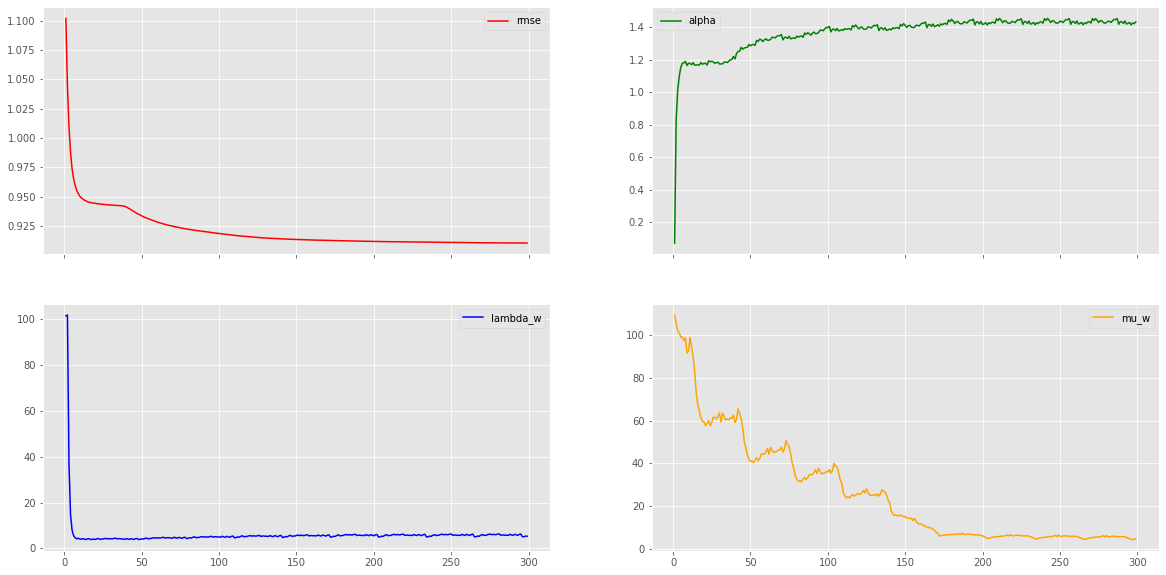

In [62]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(20,10))

# 좌측 상단
axes[0,0].plot(x, rmse_test, label='rmse', color='r')
axes[0,0].legend()
# 우측 상단
axes[0,1].plot(x, hyper_params[:, 0], label='alpha', color='g')
axes[0,1].legend()
# 좌측 하단
axes[1,0].plot(x, hyper_params[:, 1], label='lambda_w', color='b')
axes[1,0].legend()
# 우측 하단
axes[1,1].plot(x, hyper_params[:, 2], label='mu_w', color='orange')
axes[1,1].legend()

plt.show()

- 초반에 급격하게 성능이 개선되므로, 뒷부분에 편차들이 보이지 않는다.
- x의 시작범위를 조정하여(y도 같이 조정하여) 확인

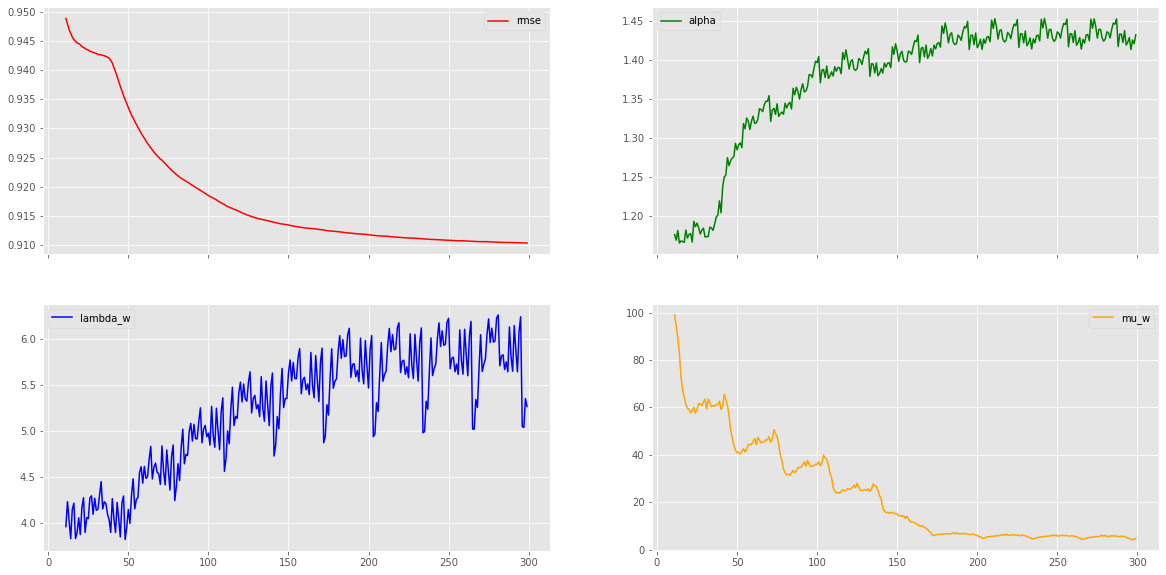

In [63]:
offset = 10
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(20,10))

# 좌측 상단
axes[0,0].plot(x[offset:], rmse_test[offset:], label='rmse', color='r')
axes[0,0].legend()
# 우측 상단
axes[0,1].plot(x[offset:], hyper_params[offset:, 0], label='alpha', color='g')
axes[0,1].legend()
# 좌측 하단
axes[1,0].plot(x[offset:], hyper_params[offset:, 1], label='lambda_w', color='b')
axes[1,0].legend()
# 우측 하단
axes[1,1].plot(x[offset:], hyper_params[offset:, 2], label='mu_w', color='orange')
axes[1,1].legend()

plt.show()

In [64]:
# 반복 학습 횟수가 150회 이상 진행되면 안정화 된다. => 박스권에서 움직인다.
# rmse 최소값
print(np.min(rmse_test))

0.9103431455761503


In [65]:
# X_test를 벡터화
X_test_v = v.transform(X_test)
X_test_v.shape

(9430, 2623)

In [66]:
# y_test 데이터 => ua.test로부터 추출
# X_test y_test를 위에서 만든 회귀 모델에 넣어서 예측

# 위에서 만들어진 알고리즘을 그대로 이용하여서 예측하는 방식
y_pred = fm.predict(X_test_v)
rmse   = np.sqrt(mean_squared_error(np.array(y_test), y_pred))
print(rmse - np.min(rmse_test), rmse)
# 실제 한번도 접하지 못한 데이터를 이용하여 평가를 수행해보니 학습 때 나왔던 rmse값보다 +0.09 높아졌다 -> 모델을 더 개선해서 0에 더 가까워지도록 만들어라(기준값에 도달했다면 종료)

0.09862116437970825 1.0089643099558585


In [67]:
# 새로 만들어서 가는데, 위의 시뮬레이션 결과로 n_iter에 대한 수치를 넣어서 처리가 가능
fm     = mcmc.FMRegression( n_iter=300, rank=rank, random_state=seed )
y_pred = fm.fit_predict(X_train_v, np.array(y_train), X_test_v)
rmse   = np.sqrt(mean_squared_error(np.array(y_test), y_pred))
rmse

0.9216592256235021

## 컬럼을 다양하게, 조합을 다르게
- 성능에 영향을 미치는 파라미터, 난수, 학습양, 데이터의 양 등을 고정하고, 조합으로 체크해보겠다.

In [68]:
candidates_cols = [
                   ['uid', 'mid', 'age', 's', 'year', 'rate'],      # year는 date에서 연도만 뽑을 것이다.
                   ['uid', 'mid', 's', 'year', 'rate'],
                   ['uid', 'mid', 'age', 's', 'rate'],
                   ['uid', 'mid', 's', 'age', 'rate'],
                   ['uid', 'mid', 'job', 'rate']
]
candidates_cols

[['uid', 'mid', 'age', 's', 'year', 'rate'],
 ['uid', 'mid', 's', 'year', 'rate'],
 ['uid', 'mid', 'age', 's', 'rate'],
 ['uid', 'mid', 's', 'age', 'rate'],
 ['uid', 'mid', 'job', 'rate']]

In [69]:
mru_tmp.head()

,mid,title,release_date,video_release_date,url,uid,rate,date,age,s,job,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,1998-02-17 17:28:52,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,1998-02-17 17:51:30,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,1998-02-17 18:20:08,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,1998-02-17 18:07:27,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,1998-02-17 17:31:36,60,M,retired,95076


In [70]:
# 타입을 문자열로 바꾸고, 데이터 한개 한개를 분해해서, 첫번째 멤버로 추출하기 위해서 단계별로 str을 처리하여 데이터 한개당 개별 분해, 첫번째 멤버 추출 과정이 수행되게 처리한다.
# https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html => pandas.Series.str.split() api를 사용한 것이다.
'''
Split strings around given separator/delimiter.
Splits the string in the Series/Index from the beginning, at the specified delimiter string. Equivalent to str.split().
'''
mru_tmp['year'] = mru_tmp.date.astype(str).str.split('-').str.get(0)
mru_tmp.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,mid,title,release_date,video_release_date,url,uid,rate,date,age,s,job,zip_code,year
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,1998-02-17 17:28:52,60,M,retired,95076,1998
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,1998-02-17 17:51:30,60,M,retired,95076,1998
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,1998-02-17 18:20:08,60,M,retired,95076,1998
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,1998-02-17 18:07:27,60,M,retired,95076,1998
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,1998-02-17 17:31:36,60,M,retired,95076,1998


In [71]:
mru_tmp.dtypes

mid                            int64
title                         object
release_date                  object
video_release_date           float64
url                           object
uid                            int64
rate                           int64
date                  datetime64[ns]
age                            int64
s                             object
job                           object
zip_code                      object
year                          object
dtype: object

In [72]:
# 수치의 벡터화를 수행하기 위해 mid, uid를 문자열로 변환
mru_tmp['uid'] = mru_tmp.uid.astype(str)
mru_tmp['mid'] = mru_tmp.mid.astype(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [73]:
mru_tmp.dtypes
# rate는 정답이다 => 별도 관리
# age는 유일하게 원래 타입 int를 유지한다.
# mid, uid, s, year는 벡터화해서 훈련, 테스트용 데이터를 준비한다.

mid                           object
title                         object
release_date                  object
video_release_date           float64
url                           object
uid                           object
rate                           int64
date                  datetime64[ns]
age                            int64
s                             object
job                           object
zip_code                      object
year                          object
dtype: object

In [74]:
# rate 추출
labels = mru_tmp['rate']
labels

0        4
1        5
2        4
3        4
4        5
        ..
99995    4
99996    3
99997    3
99998    1
99999    1
Name: rate, Length: 100000, dtype: int64

In [75]:
# 데이터
t = mru_tmp.drop('rate', axis=1)
t.head()

,mid,title,release_date,video_release_date,url,uid,date,age,s,job,zip_code,year
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,1998-02-17 17:28:52,60,M,retired,95076,1998
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,1998-02-17 17:51:30,60,M,retired,95076,1998
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,1998-02-17 18:20:08,60,M,retired,95076,1998
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,1998-02-17 18:07:27,60,M,retired,95076,1998
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,1998-02-17 17:31:36,60,M,retired,95076,1998


In [76]:
# df => dict로 변환
t.to_dict('records')[:2]

[{'age': 60,
  'date': Timestamp('1998-02-17 17:28:52'),
  'job': 'retired',
  'mid': '1',
  'release_date': '01-Jan-1995',
  's': 'M',
  'title': 'Toy Story (1995)',
  'uid': '308',
  'url': 'http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)',
  'video_release_date': nan,
  'year': '1998',
  'zip_code': '95076'},
 {'age': 60,
  'date': Timestamp('1998-02-17 17:51:30'),
  'job': 'retired',
  'mid': '4',
  'release_date': '01-Jan-1995',
  's': 'M',
  'title': 'Get Shorty (1995)',
  'uid': '308',
  'url': 'http://us.imdb.com/M/title-exact?Get%20Shorty%20(1995)',
  'video_release_date': nan,
  'year': '1998',
  'zip_code': '95076'}]

In [77]:
# dict => 벡터화
# for문 돌면서 학습 => column의 조합이 바뀐다, 동시에 다른 모든 조건을 동일하게 고정해야 한다.
# 1. 설정값(환경변수)
n_iter = 500 
rank = 8 
seed = 123
# mse => 예측한 데이터와 실제 정답 간의 거리(오차)를 제곱(음수를 제거하기 위해 제곱했음)해서 평균
# rmse => mse에 루트를 씌우서 실제값을 추출
# rmse 값이 0에 가까울수록 => 예측값과 실제 정답 간의 오차가 최소로 존재한다고 볼 수 있다.
rmse_test = list()    # 손실함수값을 저장

from tqdm import tqdm_notebook
for col in tqdm_notebook(candidates_cols) :
  # 데이터로 새로 준비 -> 컬럼이 매번 바뀐다(조합, 순서)
  tmp = mru_tmp[col].dropna()     # 결측 제거하면서 해당 컬럼만 포함해서 데이터 추출
  # y 추출
  y_train = tmp['rate']
  # rate 제거
  # dropna() 때문에 이 안에서 rate 제거
  tmp = tmp.drop('rate', axis=1)
  # dict => 벡터화 => 원-핫인코딩 수행 목적(범주형 변수(문자열) -> 0과 1로 표현, 구분 용도)
  v = DictVectorizer()
  X_train = v.fit_transform(tmp.to_dict('records'))
  print(X_train.shape, len(y_train))
  # y => 평점

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  del sys.path[0]


(100000, 2630) 100000
(100000, 2629) 100000
(100000, 2628) 100000
(100000, 2628) 100000
(100000, 2646) 100000



In [78]:
from tqdm import tqdm_notebook
for col in tqdm_notebook(candidates_cols):
  # 데이터 준비
  tmp     = mru_tmp[ col ].dropna()
  y_train = np.array(tmp['rate'])
  tmp     = tmp.drop( 'rate', axis=1 )
  v       = DictVectorizer()
  X_train = v.fit_transform( tmp.to_dict('records') )
  
  # 훈련데이터, 테스트 데이터 분류, 75:25, 난수시드 고정
  X_train_dev, X_test_dev, y_train_dev, y_test_dev = train_test_split( X_train, y_train, test_size=0.25, random_state=1 )

  # 알고리즘 생성
  fm = mcmc.FMRegression( n_iter=n_iter, rank=rank, random_state=seed )

  # 훈련->예측
  y_pred = fm.fit_predict( X_train_dev, y_train_dev, X_test_dev )

  # 평가 : rmse 계산
  rmse_test.append( np.sqrt( mean_squared_error( y_test_dev, y_pred) ) )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [79]:
# 대상 데이터들 중에 가장 큰값, 가장 작은값의 인덱스를 찾는다 -
# 인덱스를 이용하여 대상을 특정한다
np.argmax(rmse_test), np.argmin(rmse_test), rmse_test

(0,
 1,
 [0.8965186646010502,
  0.8901487813247458,
  0.8942923241252289,
  0.8942923241252289,
  0.891903225751408])

In [80]:
# 가장 성능이 좋은 컬럼의 조합은
candidates_cols[ np.argmin(rmse_test) ]
# 아래 조합이다

['uid', 'mid', 's', 'year', 'rate']

# 시스템 통합/구축 (생략)